In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rahul-dahmer/INFY.NS.csv
/kaggle/input/rahul-dahmer/EICHERMOT.NS.csv
/kaggle/input/rahul-dahmer/GAIL.NS.csv
/kaggle/input/rahul-dahmer/TITAN.NS.csv
/kaggle/input/rahul-dahmer/RELIANCE.NS.csv
/kaggle/input/rahul-dahmer/TATAMOTORS.NS.csv
/kaggle/input/rahul-dahmer/CIPLA.NS.csv
/kaggle/input/rahul-dahmer/COALINDIA.NS.csv
/kaggle/input/rahul-dahmer/JSWSTEEL.NS.csv
/kaggle/input/rahul-dahmer/HDFC.NS.csv
/kaggle/input/rahul-dahmer/BAJAJ-AUTO.NS.csv
/kaggle/input/rahul-dahmer/TCS.NS.csv
/kaggle/input/rahul-dahmer/BRITANNIA.NS.csv
/kaggle/input/rahul-dahmer/TECHM.NS.csv
/kaggle/input/rahul-dahmer/HDFCBANK.NS.csv
/kaggle/input/rahul-dahmer/BPCL.NS.csv
/kaggle/input/rahul-dahmer/INFRATEL.NS.csv
/kaggle/input/rahul-dahmer/MARUTI.NS.csv
/kaggle/input/rahul-dahmer/POWERGRID.NS.csv
/kaggle/input/rahul-dahmer/TATASTEEL.NS.csv
/kaggle/input/rahul-dahmer/AXISBANK.NS.csv
/kaggle/input/rahul-dahmer/UPL.NS.csv
/kaggle/input/rahul-dahmer/ICICIBANK.NS.csv
/kaggle/input/rahul-dahmer/ULTRACEMCO.

In [6]:
df=pd.read_csv("/kaggle/input/rahul-dahmer/BAJFINANCE.NS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-04,76.560600,77.240700,75.297501,76.113701,41.875244,320714.0
1,2010-10-05,75.307297,76.560600,75.010902,75.686203,41.640049,330811.0
2,2010-10-06,78.892403,78.892403,75.103203,77.673103,42.733185,712004.0
3,2010-10-07,76.852097,78.406601,75.608498,76.157402,41.899292,392072.0
4,2010-10-08,75.783302,77.629303,75.448097,75.710503,41.653423,206468.0
...,...,...,...,...,...,...,...
1972,2018-09-25,2235.000000,2330.350098,2180.600098,2299.199951,2299.199951,5537396.0
1973,2018-09-26,2329.000000,2353.949951,2295.100098,2315.550049,2315.550049,2728756.0
1974,2018-09-27,2323.399902,2323.399902,2192.149902,2204.199951,2204.199951,2796294.0
1975,2018-09-28,2232.000000,2248.000000,2117.000000,2168.000000,2168.000000,3831096.0


In [7]:
any_nan = df['Close'].isna().any()
any_nan

True

In [8]:
nan_count = df['Close'].isna().sum()
nan_count

6

In [10]:
df=df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-04,76.560600,77.240700,75.297501,76.113701,41.875244,320714.0
1,2010-10-05,75.307297,76.560600,75.010902,75.686203,41.640049,330811.0
2,2010-10-06,78.892403,78.892403,75.103203,77.673103,42.733185,712004.0
3,2010-10-07,76.852097,78.406601,75.608498,76.157402,41.899292,392072.0
4,2010-10-08,75.783302,77.629303,75.448097,75.710503,41.653423,206468.0
...,...,...,...,...,...,...,...
1972,2018-09-25,2235.000000,2330.350098,2180.600098,2299.199951,2299.199951,5537396.0
1973,2018-09-26,2329.000000,2353.949951,2295.100098,2315.550049,2315.550049,2728756.0
1974,2018-09-27,2323.399902,2323.399902,2192.149902,2204.199951,2204.199951,2796294.0
1975,2018-09-28,2232.000000,2248.000000,2117.000000,2168.000000,2168.000000,3831096.0


In [6]:
if df['Close'].isna().sum().sum() > 0:
    print("DataFrame contains NaN values")
else:
    print("DataFrame does not contain NaN values")

DataFrame does not contain NaN values


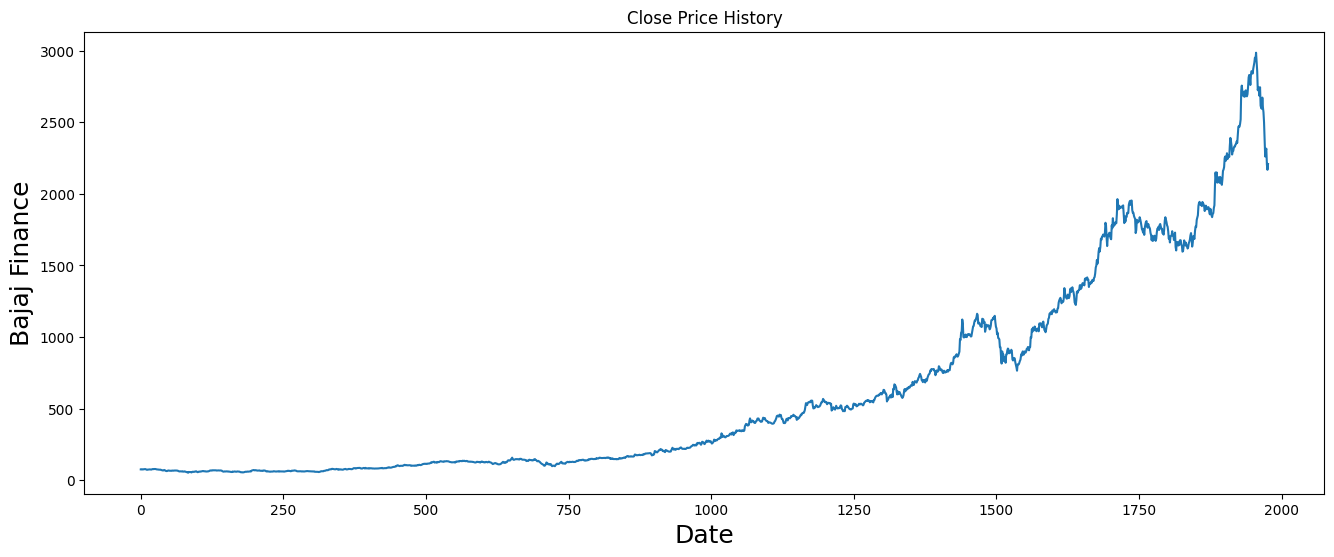

In [7]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Bajaj Finance', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .75 ))

training_data_len

1479

In [9]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00791814],
       [0.00777237],
       [0.00844989],
       ...,
       [0.73358175],
       [0.7212378 ],
       [0.73504804]])

In [10]:
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len-90: , :]
len(test_data)


582

In [11]:
def create(datas, step):
    datax, datay = [], []
    for i in range(len(datas) - step - 1):
        a = datas[i:(i + step), 0]  # Corrected indexing syntax
        datax.append(a)
        datay.append(datas[i + step, 0])
    return np.array(datax), np.array(datay)

In [12]:
step=90
x_train,y_train=create(train_data,step)
x_test,y_test=create(test_data,step)

In [13]:
print(x_train)
print()
print(y_train)

[[0.00791814 0.00777237 0.00844989 ... 0.00147759 0.00151902 0.00068414]
 [0.00777237 0.00844989 0.00793304 ... 0.00151902 0.00068414 0.00184535]
 [0.00844989 0.00793304 0.00778065 ... 0.00068414 0.00184535 0.00230754]
 ...
 [0.24295007 0.24199017 0.23215932 ... 0.35657933 0.35913678 0.3356253 ]
 [0.24199017 0.23215932 0.23628877 ... 0.35913678 0.3356253  0.34201892]
 [0.23215932 0.23628877 0.24343427 ... 0.3356253  0.34201892 0.3525215 ]]

[0.00184535 0.00230754 0.00222635 ... 0.34201892 0.3525215  0.35151559]


In [14]:
print(x_train.shape),print(y_train.shape)

(1388, 90)
(1388,)


(None, None)

In [15]:
y_train


array([0.00184535, 0.00230754, 0.00222635, ..., 0.34201892, 0.3525215 ,
       0.35151559])

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
nan_indices = np.argwhere(np.isnan(x_train))
if len(nan_indices) > 0:
    print("NaN values found in x_train at indices:")
    print(nan_indices)
else:
    print("No NaN values found in x_train")

# Check for NaN values in y_train
if np.isnan(y_train).any():
    print("NaN values found in y_train")
else:
    print("No NaN values found in y_train")

No NaN values found in x_train
No NaN values found in y_train


In [18]:
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM,Dropout
from keras.callbacks import EarlyStopping

2024-04-02 16:03:37.753151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 16:03:37.753332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 16:03:37.941163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
# Adding noise to training data
x_train_noisy = x_train + np.random.normal(0, 0.1, x_train.shape)
y_train_noisy = y_train + np.random.normal(0, 0.1, y_train.shape)

In [20]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(45, return_sequences=True, input_shape=(90, 1)))
model.add(Dropout(0.4))
model.add(LSTM(20, return_sequences=False))  
model.add(Dropout(0.2))
# Replace Dense output layer with a normal one
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=2)
# Train the model
model.fit(x_train_noisy, y_train_noisy, batch_size=15, epochs=4)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/4
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0146
Epoch 2/4
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0112
Epoch 3/4
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0118
Epoch 4/4
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0107


In [21]:
x_test.shape

(491, 90, 1)

In [22]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [23]:
y_train.shape

(1388,)

In [24]:
# Inverting predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)) # Reshape y_train to 2D
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)) # Reshape y_test to 2D


In [25]:
test_predict

array([[1027.6161 ],
       [1026.1821 ],
       [1024.8749 ],
       [1023.4867 ],
       [1021.6259 ],
       [1019.66003],
       [1018.05804],
       [1017.6117 ],
       [1017.9996 ],
       [1019.04126],
       [1020.8388 ],
       [1023.0225 ],
       [1025.7493 ],
       [1028.9608 ],
       [1031.4578 ],
       [1032.7043 ],
       [1032.7974 ],
       [1031.1307 ],
       [1028.511  ],
       [1024.3682 ],
       [1019.1675 ],
       [1013.14557],
       [1005.4039 ],
       [ 996.6368 ],
       [ 985.6947 ],
       [ 972.5136 ],
       [ 959.9804 ],
       [ 947.4287 ],
       [ 935.3174 ],
       [ 922.7429 ],
       [ 910.77344],
       [ 899.33093],
       [ 887.88464],
       [ 878.0592 ],
       [ 869.62384],
       [ 863.04346],
       [ 858.2442 ],
       [ 854.7395 ],
       [ 851.6712 ],
       [ 849.42944],
       [ 847.76794],
       [ 846.4385 ],
       [ 845.8816 ],
       [ 845.5453 ],
       [ 844.2003 ],
       [ 842.0784 ],
       [ 839.74097],
       [ 837.

In [26]:
y_test

array([[1077.25    ],
       [1082.5     ],
       [1073.949951],
       [1053.949951],
       [1061.300049],
       [1078.849976],
       [1117.349976],
       [1118.849976],
       [1121.400024],
       [1134.300049],
       [1128.949951],
       [1141.699951],
       [1148.400024],
       [1104.800049],
       [1072.550049],
       [1060.800049],
       [1019.849976],
       [1030.849976],
       [ 993.150024],
       [ 990.400024],
       [ 983.700012],
       [ 929.150024],
       [ 929.200012],
       [ 858.099976],
       [ 815.049988],
       [ 899.799988],
       [ 871.150024],
       [ 878.400024],
       [ 832.200012],
       [ 858.      ],
       [ 850.25    ],
       [ 820.700012],
       [ 877.900024],
       [ 879.25    ],
       [ 907.25    ],
       [ 919.799988],
       [ 914.200012],
       [ 886.5     ],
       [ 902.25    ],
       [ 898.049988],
       [ 891.049988],
       [ 911.549988],
       [ 896.349976],
       [ 843.599976],
       [ 836.75    ],
       [ 8

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,test_predict)

print("Mean Squared Error:", mse)


Mean Squared Error: 54758.628531970026


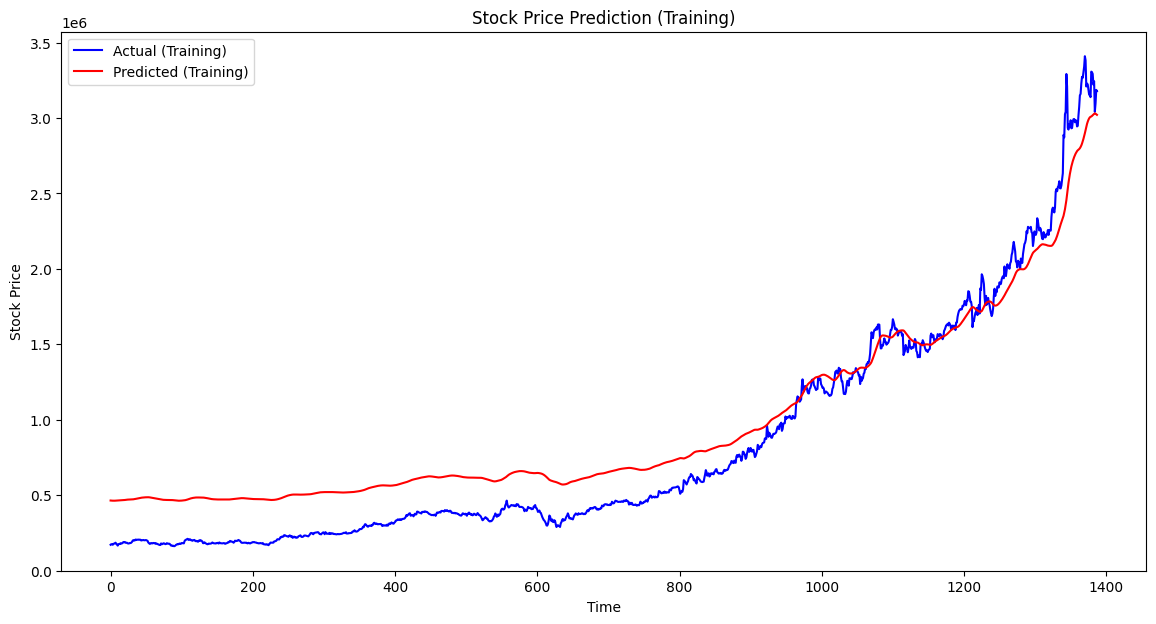

In [28]:
import matplotlib.pyplot as plt

# Transform the predicted data back to original scale
train_predict_orig = scaler.inverse_transform(train_predict)
test_predict_orig = scaler.inverse_transform(test_predict)

# Plotting training data
plt.figure(figsize=(14, 7))
plt.plot(np.arange(0, len(train_predict_orig)), scaler.inverse_transform(y_train.reshape(-1, 1)), 'b-', label="Actual (Training)")
plt.plot(np.arange(0, len(train_predict_orig)), train_predict_orig, 'r-', label="Predicted (Training)")
plt.title('Stock Price Prediction (Training)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



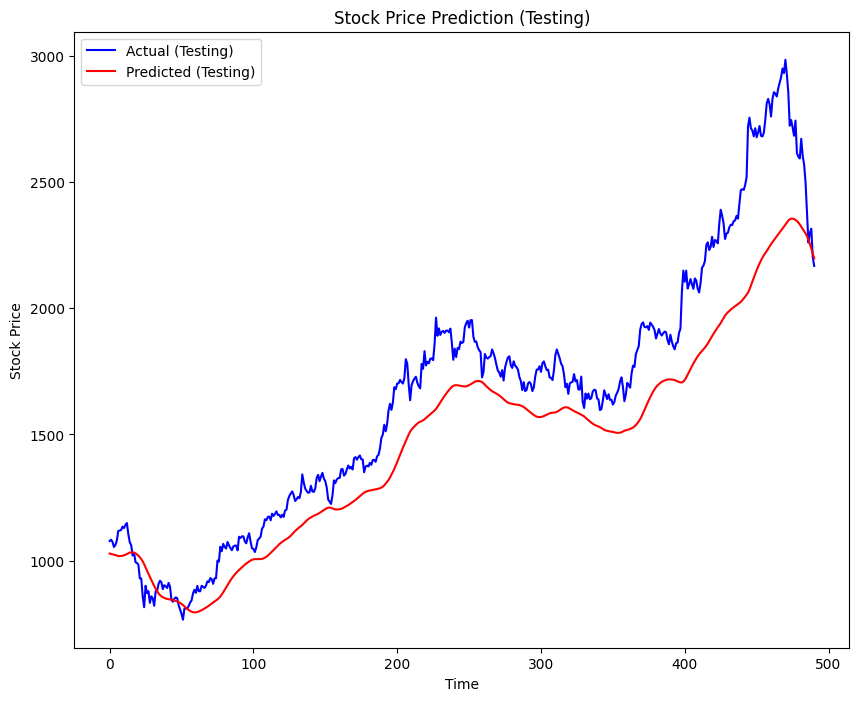

In [30]:
# Plotting the testing data results
plt.figure(figsize=(10, 8))
plt.plot(y_test.flatten(), 'b-', label="Actual (Testing)")
plt.plot(test_predict.flatten(), 'r-', label="Predicted (Testing)")
plt.title('Stock Price Prediction (Testing)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [31]:
data1=np.ravel(test_predict)
df_pred=pd.DataFrame(data1, columns=['Close_pred'])

In [32]:
df_actual=data.iloc[len(data)-len(df_pred):]
df_actual=df_actual.copy()

In [33]:
df_actual.rename(columns={'Close': 'Close_actual'},inplace=True)

In [34]:
df_pred.reset_index(drop=True,inplace=True)
df_actual.reset_index(drop=True,inplace=True)
combined_df=df_pred.join(df_actual)
combined_df

,Close_pred,Close_actual
0,1027.616089,1082.500000
1,1026.182129,1073.949951
2,1024.874878,1053.949951
3,1023.486694,1061.300049
4,1021.625916,1078.849976
...,...,...
486,2272.660400,2299.199951
487,2255.735840,2315.550049
488,2237.469727,2204.199951
489,2218.811523,2168.000000


In [35]:
sum=0
for i in range(len(combined_df)):
    diff=((combined_df['Close_actual'][i]-combined_df['Close_pred'][i])/(combined_df['Close_actual'][i]))*100
    sum+=abs(diff)

variation=sum/len(combined_df)
print(variation)

10.818294017508276


In [45]:
import math
change=math.ceil(variation)
print(change)


11


In [46]:
#change=5

In [47]:
start=0
pos=0
c=0
amount=10000
pnl=0
pnl_actual=0
total_loss=0
profits = []
profits_real = []
trades={"long":0,"short":0}
for i in range(len(combined_df)):
    if  not pos:
        initial_amount=combined_df['Close_pred'][start]
        qty=10000//initial_amount
        pos=1

        initial_amount_actual=combined_df['Close_actual'][start]
        qty_actual=10000//initial_amount_actual

    s=((combined_df['Close_pred'][i]-initial_amount)/combined_df['Close_pred'][i])*100

    if abs(s)>=change and s<0:
        trades['short']+=1
        pos=0
        start=i


        pnl+=(initial_amount-combined_df['Close_pred'][i])*qty

        pnl_actual+=(initial_amount_actual-combined_df['Close_actual'][i])*qty_actual


        
    
    if abs(s)>=change and s>0:
        trades['long']+=1
        pos=0
        start=i


        pnl+=(combined_df['Close_pred'][i]-initial_amount)*qty

        pnl_actual+=(combined_df['Close_actual'][i]-initial_amount_actual)*qty_actual


    profits.append(pnl)
    profits_real.append(pnl_actual)


In [48]:
print(trades)
print("profit={}".format(pnl))
print("returns={:.2f}%".format((pnl/amount)*100))
print("profit_real={}".format(pnl_actual))

{'long': 9, 'short': 3}
profit=13386.67431640625
returns=133.87%
profit_real=20075.700447


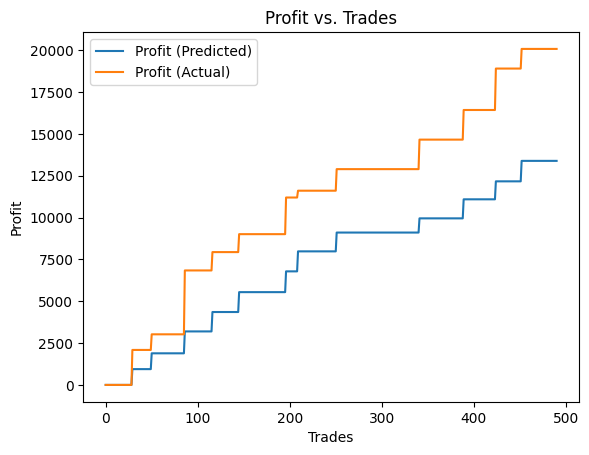

In [49]:
import matplotlib.pyplot as plt
plt.plot(profits, label='Profit (Predicted)')
plt.plot(profits_real, label='Profit (Actual)')
plt.xlabel('Trades')
plt.ylabel('Profit')
plt.title('Profit vs. Trades')
plt.legend()
plt.show()